<Axes: title={'center': 'Category Count'}, xlabel='Category'>

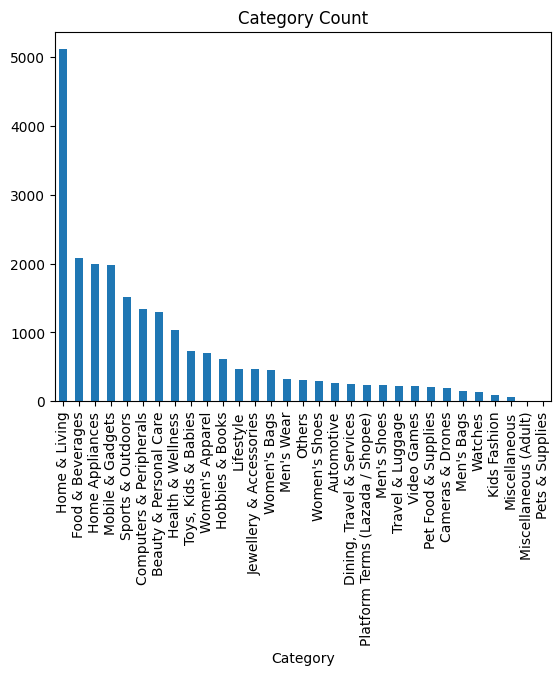

In [3]:
import pickle
from pandas import DataFrame

with open('./data/excel.pkl', 'rb') as f:
    excel = pickle.load(f)

country = 'SG'
# dataframe 包含 Keyword, Category 列
data = excel[country].drop_duplicates(
    subset=['Keyword'], keep='first').reset_index(drop=True)  # type: ignore

# 分类各个 Category 的数量
category_count = data['Category'].value_counts()
# 绘制为柱状图
category_count.plot(kind='bar', title='Category Count')

# 绘制饼图
# category_count.plot(kind='pie', title='Category Count', autopct='%1.1f%%')

<Axes: title={'center': 'Test Category Count'}, ylabel='count'>

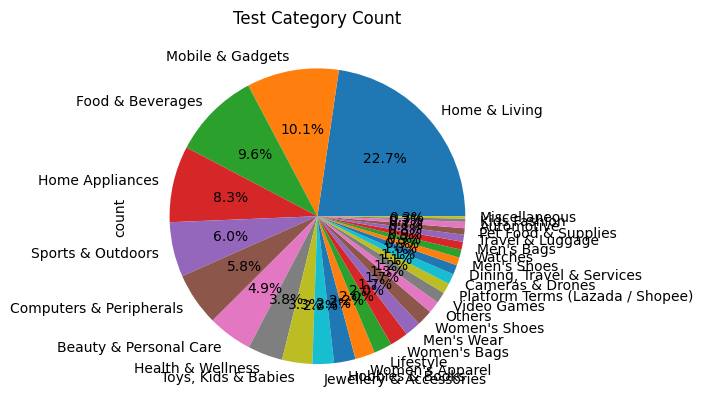

In [5]:
import pickle
from pandas import DataFrame
from sklearn.model_selection import train_test_split

with open('./data/excel.pkl', 'rb') as f:
    excel = pickle.load(f)

country = 'SG'
# dataframe 包含 Keyword, Category 列
data = excel[country].drop_duplicates(
    subset=['Keyword'], keep='first').reset_index(drop=True)  # type: ignore

X = data["Keyword"]
y = data["Category"]

# 使用 train_test_split 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X.tolist(), y.tolist(), test_size=0.05, random_state=0)

train_df = DataFrame({'Keyword': X_train, 'Category': y_train})
test_df = DataFrame({'Keyword': X_test, 'Category': y_test})

# 分类各个 Category 的数量
train_category_count = train_df['Category'].value_counts()
test_category_count = test_df['Category'].value_counts()

# 绘制为柱状图
# train_category_count.plot(kind='bar', title='Train Category Count')
# test_category_count.plot(kind='bar', title='Test Category Count')

# 绘制饼图
# train_category_count.plot(
#     kind='pie', title='Train Category Count', autopct='%1.1f%%')
test_category_count.plot(
    kind='pie', title='Test Category Count', autopct='%1.1f%%')

In [1]:
"""
分词训练集和测试集词汇表差异
"""


def read_vocab(vocab_path):
    with open(vocab_path, 'r') as f:
        return f.readlines()


def write_vocab(vocab_path, words):
    with open(vocab_path, 'w') as f:
        f.writelines(words)


# 分析训练集和测试集的分词结果的差异
country = 'SG'
train_vocab_path = f'./vocab/{country}/train_vocab.txt'
test_vocab_path = f'./vocab/{country}/test_vocab.txt'

train_words = read_vocab(train_vocab_path)
test_words = read_vocab(test_vocab_path)
train_words, test_words = set(train_words), set(test_words)
print(f'训练集词汇量: {len(train_words)}')
print(f'测试集词汇量: {len(test_words)}')
print(f'测试集和训练集词汇量差异: {len(test_words - train_words)}')
print(f'测试集和训练集词汇量差异: {(test_words - train_words)}')
write_vocab(f'./vocab/{country}/test_train_diff_vocab.txt',
            test_words - train_words)

训练集词汇量: 9867
测试集词汇量: 1490
测试集和训练集词汇量差异: 271
测试集和训练集词汇量差异: {'evadict\n', '10lb\n', 'lorna\n', 'vento\n', 'sara\n', '288mail\n', 'torpedo\n', 'jade\n', 'k6\n', 'c55\n', '足贴\n', 'lindberg\n', 'bonia\n', 'fyre\n', 'cauliflower\n', 'osakakuma\n', 'bcw\n', 'waterdrop\n', 'disinfection\n', 'select\n', '5i\n', 'ashwagandha\n', 'skinzen\n', 'ashtray\n', 'daster\n', 'allstar\n', 'cro\n', 'beacon1\n', 'muslim\n', 'thermaltake\n', 'primal\n', 'ichiyo\n', 'mf11\n', 'wei\n', 'shahi\n', 'vernici\n', 'lapel\n', 'puncher\n', 'supermarkt\n', 'utd\n', 'locksmith\n', 'mori\n', 'sgfishingrigz\n', 'ollella\n', 'meixin\n', 'kosas\n', 'amazon.sg\n', 'dage\n', 'coq\n', 'note12\n', 'pixiu\n', 'sugru\n', '老\n', 'epsom\n', 'dig\n', 'vibrant\n', 'showy\n', 'semi\n', 'sheridan\n', 'p2o\n', 'liter\n', 'rog3\n', 'oem\n', 'separator\n', 'azanis\n', 'tf\n', 'golfshoe\n', 'merida\n', '青龙\n', 'fragrancecart\n', 'fixer\n', 'psp\n', 'bossipaw\n', 'moc\n', 'crossing\n', 'motivation\n', 's15\n', 'agility\n', 'garage\n', 'rad

In [ ]:
import pandas as pd
from dataset import get_df_from_csv
df = get_df_from_csv(
    f"./data/shopee_sg/keyword.csv", use_cache=True)

df.keys()